In [2]:
import numpy as np 
import pandas as pd 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# train data

usedcar_train = pd.read_csv(r"C:\Users\ASUS\21MIA1100\train-data.csv")
usedcar_train
# 6019 rows × 14 columns



,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [5]:
usedcar_train.info()

# null data - Mileage, Engine, Power, Seats - little, New_Price - too many

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
# test data

usedcar_test = pd.read_csv(r"C:\Users\ASUS\21MIA1100\test-data.csv")
usedcar_test
# 1234 rows × 13 columns

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [7]:
usedcar_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [8]:
# remove 'Unnamed: 0' and 'New_Price' in train data

usedcar_train = usedcar_train.drop(['Unnamed: 0', 'New_Price'], axis=1)
usedcar_train
# 6019 rows × 12 columns

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [9]:
# remove 'Unnamed: 0' and'New_Price' in test data

usedcar_test = usedcar_test.drop(['Unnamed: 0', 'New_Price'], axis=1)
usedcar_test
# 1234 rows × 11 columns

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0


In [10]:
# remove the unit on Mileage, Engine, and Power

import re

usedcar_train['Mileage'] = usedcar_train['Mileage'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
usedcar_train['Engine'] = usedcar_train['Engine'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
usedcar_train['Power'] = usedcar_train['Power'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))

usedcar_train.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50


In [11]:
# from object to numeric data type of Mileage, Engine, Power, and New_Price

usedcar_train['Mileage'] = pd.to_numeric(usedcar_train['Mileage'])
usedcar_train['Engine'] = pd.to_numeric(usedcar_train['Engine'])
usedcar_train['Power'] = pd.to_numeric(usedcar_train['Power'])

In [12]:
usedcar_train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [13]:
# look into Name

import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

# usedcar_train.Name.unique() too much
usedcar_train.Name.unique()[:10]

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', 'Maruti Ertiga VDI',
       'Audi A4 New 2.0 TDI Multitronic',
       'Hyundai EON LPG Era Plus Option', 'Nissan Micra Diesel XV',
       'Toyota Innova Crysta 2.8 GX AT 8S',
       'Volkswagen Vento Diesel Comfortline',
       'Tata Indica Vista Quadrajet LS'], dtype=object)

In [14]:
# look into Name

usedcar_train.Name.value_counts()[:20]

Mahindra XUV500 W8 2WD              49
Maruti Swift VDI                    45
Honda City 1.5 S MT                 34
Maruti Swift Dzire VDI              34
Maruti Swift VDI BSIV               31
Maruti Ritz VDi                     30
Hyundai i10 Sportz                  30
Toyota Fortuner 3.0 Diesel          29
Honda Amaze S i-Dtech               27
Hyundai Grand i10 Sportz            27
Maruti Ertiga VDI                   25
Honda Brio S MT                     25
Honda City 1.5 V MT                 24
Hyundai Verna 1.6 SX                23
Maruti Wagon R VXI                  23
Maruti Wagon R LXI                  22
Maruti Alto LXi                     21
Hyundai EON Era Plus                20
Maruti Ertiga ZDI                   20
Skoda Superb Elegance 1.8 TSI AT    20
Name: Name, dtype: int64

In [15]:
print(usedcar_train['Location'].unique())
print(usedcar_train['Fuel_Type'].unique())
print(usedcar_train['Transmission'].unique())
print(usedcar_train['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [16]:
usedcar_train.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50


In [17]:
usedcar_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [18]:
train_notnull = usedcar_train.dropna(axis=0)
train_notnull

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [19]:
train_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [20]:
# correlation of Numeric data 

corrmat = train_notnull.corr()
corrmat

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26636\121462245.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train_notnull.corr()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.169369,0.285623,-0.068045,0.014531,0.007833,0.299475
Kilometers_Driven,-0.169369,1.000000,-0.060608,0.093030,0.033490,0.083072,-0.008249
Mileage,0.285623,-0.060608,1.000000,-0.637258,-0.538844,-0.331576,-0.341652
Engine,-0.068045,0.093030,-0.637258,1.000000,0.866301,0.401116,0.658047
Power,0.014531,0.033490,-0.538844,0.866301,1.000000,0.101460,0.772843
Seats,0.007833,0.083072,-0.331576,0.401116,0.101460,1.000000,0.055547
Price,0.299475,-0.008249,-0.341652,0.658047,0.772843,0.055547,1.000000


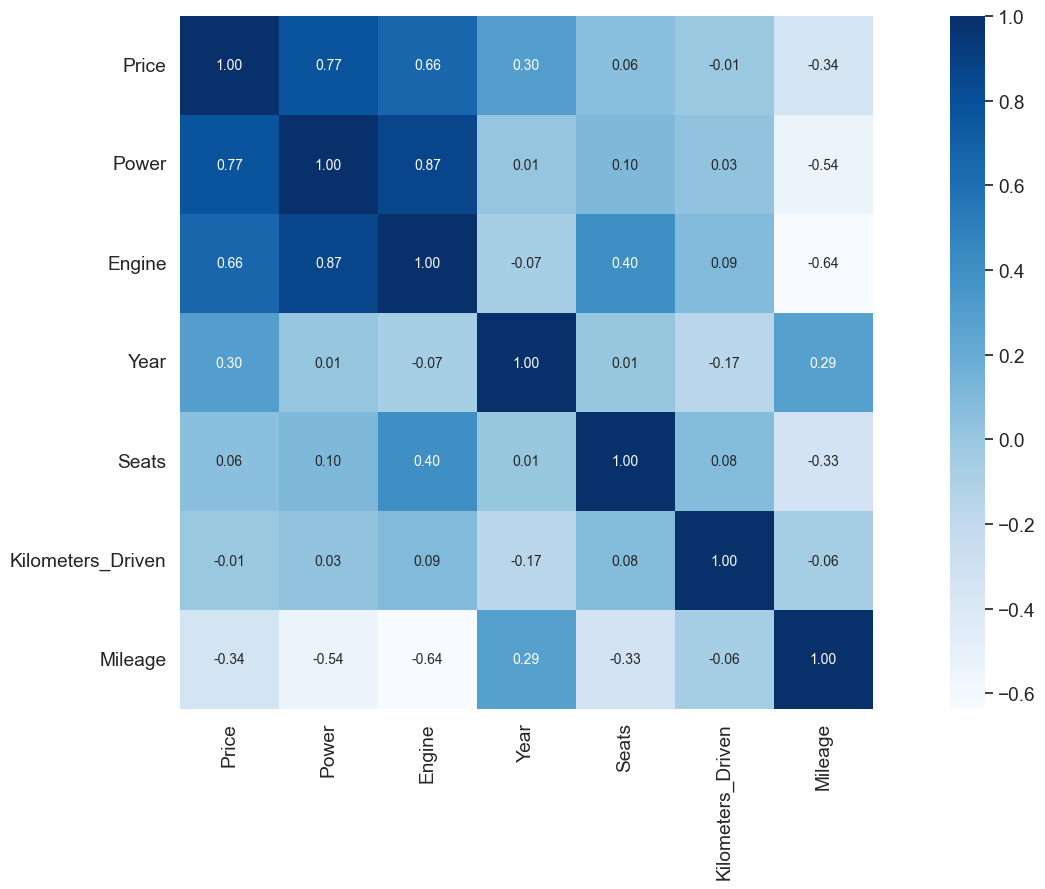

In [21]:
plt.figure(figsize=(20, 9))
k=7
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(train_notnull[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

# Power > Engine > Mileage(-) > Year > Seat > Kilometers_Driven(-) : fairly reasonable
# In general, expensive cars have low Mileage.


In [57]:
#outlier using inter quartile range
q3 = train_notnull['Kilometers_Driven'].quantile(0.75) 
q1 = train_notnull['Kilometers_Driven'].quantile(0.25)

iqr = q3 - q1
iqr
# 38980.25

38980.25

In [73]:
#train_notnull, which is a DataFrame containing the training data, variable,
#which represents the variable to be analyzed, and target,
#which represents the target variable.
def outlier_Kilometers_Driven(train_notnull):
    kilometers = train_notnull['Kilometers_Driven']
    if kilometers > q3 + 1.5 * iqr or kilometers < q1 - 1.5 * iqr:
        return True
    else:
        return False

train_notnull['outlier_kilometers'] = train_notnull.apply(outlier_Kilometers_Driven, axis = 1) 

train_notnull
# 5872 rows × 13 columns

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26636\2495197461.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_notnull['outlier_kilometers'] = train_notnull.apply(outlier_Kilometers_Driven, axis = 1)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,outlier_kilometers
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,False
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,False
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,False
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,False
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,False
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,False
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,False
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,False


In [59]:
train_notnull_trim = train_notnull.loc[train_notnull['outlier_kilometers'] == False]

del train_notnull_trim['outlier_kilometers']

train_notnull_trim
# 5673 rows × 12 columns after removing outliers in Kilometers_Driven

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


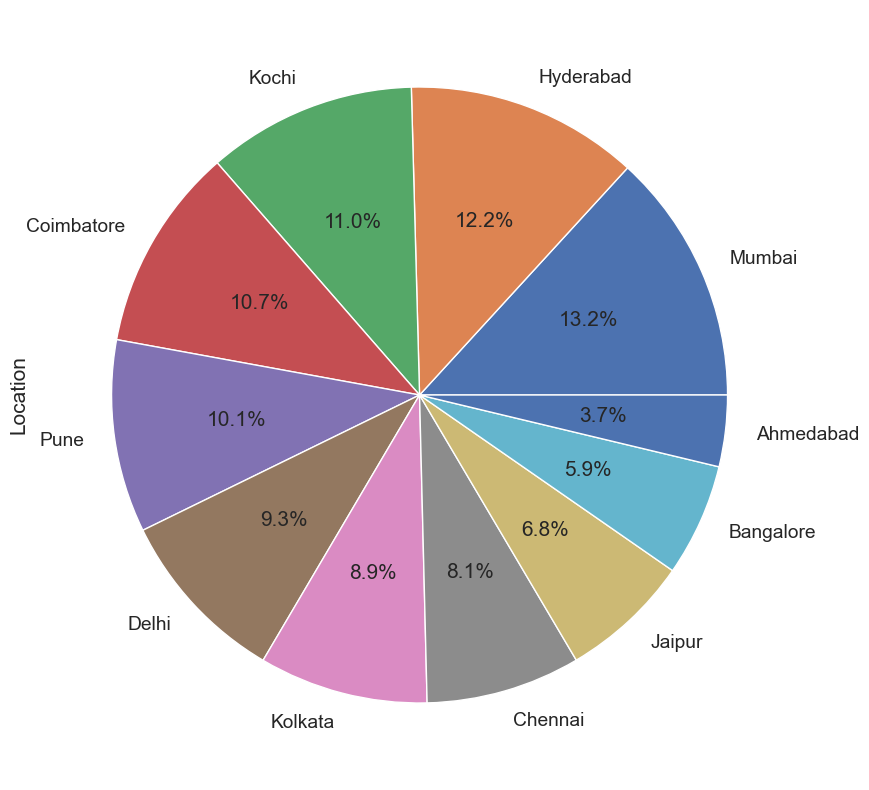

In [61]:
plt.figure(1, figsize=(10,10))
train_notnull['Location'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

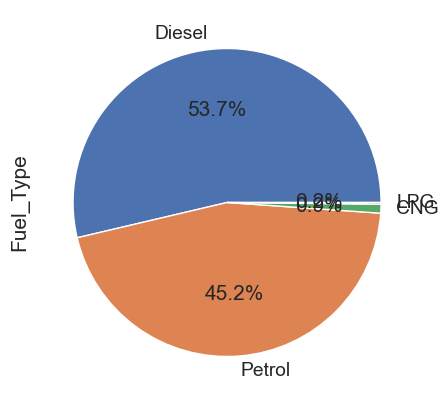

In [27]:
plt.figure(1, figsize=(5,5))
train_notnull['Fuel_Type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

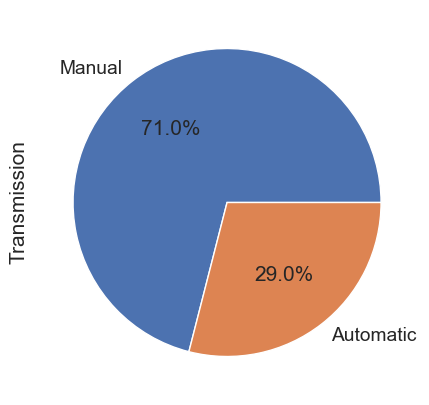

In [28]:
plt.figure(1, figsize=(5,5))
train_notnull['Transmission'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

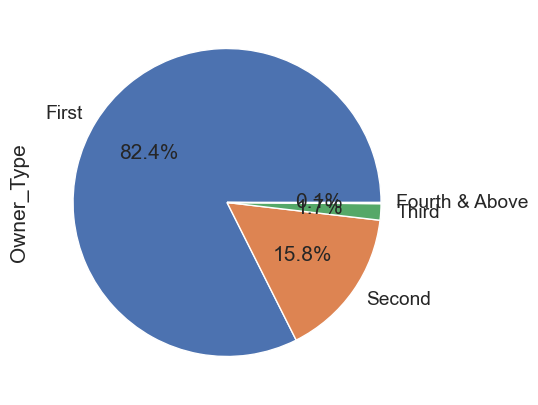

In [29]:
plt.figure(1, figsize=(5,5))
train_notnull['Owner_Type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [52]:
train_notnull_trim.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,1.95


In [31]:
train_final = train_notnull_trim.drop(['Name'], axis=1)
train_final
# 5673 rows × 11 columns

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [72]:
train_feature = train_final.drop(['Price'], axis=1)
train_target = train_final.Price
train_feature.shape, train_target.shape
train_target

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5673, dtype: float64

In [64]:
train_feature_ohe = pd.get_dummies(train_feature, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
#one hot encoding

In [65]:
from sklearn.model_selection import train_test_split 

X_train, X_validation, y_train, y_validation = train_test_split(train_feature_ohe, train_target, test_size=0.3, random_state=2209)
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape
#Split train data to train and validation

((3971, 27), (1702, 27), (3971,), (1702,))

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#Evaluation by MAE, RMSE, RMSLE
def evaluate_regr(y,pred):
    # MAE
    mae = mean_absolute_error(y,pred)
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(y,pred))
    
    # RMSLE
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    msle = np.mean((log_y - log_pred) ** 2)
    rmsle = np.sqrt(msle)    
    
    print(f'MAE: {mae:.3f}, RMSE: {rmse:.3f}, RMSLE: {rmsle:.3f}')

In [67]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_validation)

evaluate_regr(y_validation, pred)
# Linear regression

MAE: 3.614, RMSE: 5.642, RMSLE: 0.587


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26636\2036142032.py:12: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [68]:
def get_model_predict(model, X_train, X_validation, y_train, y_validation):
    model.fit(X_train, y_train)
    pred = model.predict(X_validation)

    print('#',model.__class__.__name__,)
    evaluate_regr(y_validation, pred) 

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_validation, y_train, y_validation)


# LinearRegression
MAE: 3.614, RMSE: 5.642, RMSLE: 0.587
# Ridge
MAE: 3.613, RMSE: 5.641, RMSLE: 0.614
# Lasso
MAE: 3.613, RMSE: 5.642, RMSLE: 0.581


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26636\2036142032.py:12: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26636\2036142032.py:12: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26636\2036142032.py:12: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


<Axes: >

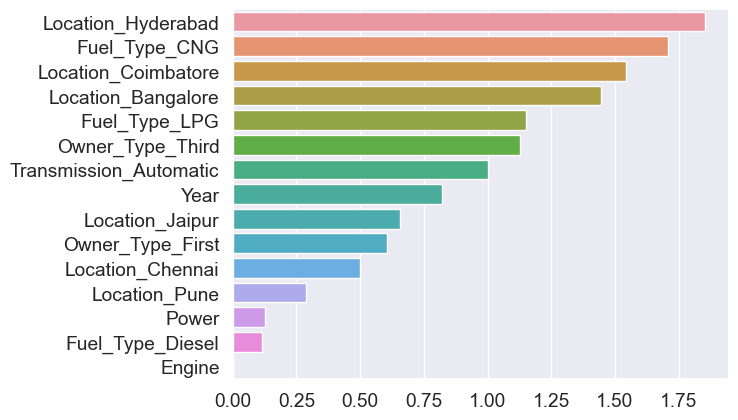

In [38]:
coef = pd.Series(lr_reg.coef_ , index=train_feature_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:15]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

# Apply RF, GBM, XGBoost, LightGBM models

In [69]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model,X_train, X_validation, y_train, y_validation)

    

# RandomForestRegressor
MAE: 1.511, RMSE: 3.425, RMSLE: 0.182
# GradientBoostingRegressor
MAE: 1.514, RMSE: 3.383, RMSLE: 0.197
# XGBRegressor
MAE: 1.413, RMSE: 3.365, RMSLE: 0.183


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26636\2036142032.py:12: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


# LGBMRegressor
MAE: 1.348, RMSE: 2.859, RMSLE: 0.175


In [40]:
usedcar_test.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0


In [75]:
# remove the unit on Mileage, Engine, and Power

import re

usedcar_test['Mileage'] = usedcar_test['Mileage'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
usedcar_test['Engine'] = usedcar_test['Engine'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
usedcar_test['Power'] = usedcar_test['Power'].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))

usedcar_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796.0,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197.0,82.85,5.0


In [42]:
# from object to numeric data type of Mileage, Engine, Power, and New_Price

usedcar_test['Mileage'] = pd.to_numeric(usedcar_test['Mileage'])
usedcar_test['Engine'] = pd.to_numeric(usedcar_test['Engine'])
usedcar_test['Power'] = pd.to_numeric(usedcar_test['Power'])

In [43]:
usedcar_test.info()
# null data - Engine, Power, Seats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1224 non-null   float64
 9   Power              1202 non-null   float64
 10  Seats              1223 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 106.2+ KB


In [44]:
test_notnull = usedcar_test.dropna(axis=0)
test_notnull
# 1201 rows × 11 columns

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0


In [45]:
test_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1201 non-null   object 
 1   Location           1201 non-null   object 
 2   Year               1201 non-null   int64  
 3   Kilometers_Driven  1201 non-null   int64  
 4   Fuel_Type          1201 non-null   object 
 5   Transmission       1201 non-null   object 
 6   Owner_Type         1201 non-null   object 
 7   Mileage            1201 non-null   float64
 8   Engine             1201 non-null   float64
 9   Power              1201 non-null   float64
 10  Seats              1201 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 112.6+ KB


In [46]:
test_final = test_notnull.drop(['Name'], axis=1)
test_final
# 5673 rows × 11 columns

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
5,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0
...,...,...,...,...,...,...,...,...,...,...
1229,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0
1230,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0
1231,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0
1232,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0


In [47]:
train_feature_ohe = pd.get_dummies(train_feature, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
train_feature_ohe
# 5673 rows × 27 columns

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [48]:
# One Hot Encoding 
test_final_ohe = pd.get_dummies(test_final, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
test_final_ohe
# 1201 rows × 27 columns

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26,998.0,58.20,4.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2013,54493,24.70,796.0,47.30,5.0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2,2017,34000,13.68,2393.0,147.80,7.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,2014,29000,18.50,1197.0,82.85,5.0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
5,2016,85609,16.00,2179.0,140.00,7.0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598.0,103.60,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1230,2015,59000,17.21,1197.0,103.60,5.0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1231,2012,28000,23.08,1461.0,63.10,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1232,2013,52262,17.20,1197.0,103.60,5.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [74]:
pred = lgbm_reg.predict(test_final_ohe)
#LightGBM regression model perdicted values are printed
pred[0:20]

array([ 2.91079051,  2.93002658, 18.95075246,  4.14081026, 11.38866114,
       20.91309635,  2.43062119,  3.32541602, 11.25521762, 18.92427181,
        4.62498443,  2.45796254,  2.53097976,  5.174673  , 18.54682973,
       27.36803924,  1.52269178,  6.74704743,  5.23825951,  4.03814136])